In [160]:
# CSI5155 - ASSIGNEMENT 1 
# FALL 2022
# ADRIEN HEYMANS
# Pr. Herna L. Viktor, Phd

In [176]:
# Importing the data

import numpy as np
import pandas as pd

data = "data/drug_consumption.csv"

df = pd.read_csv(data)
df.columns = ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

# We want to convert this problem to a binary classification C1,C2 = "non-user" and C3,C4,C5,C6 = "user"
df = df.replace(['CL0','CL1'],0)
df = df.replace(['CL2','CL3','CL4','CL5','CL6'],1)

#saving the processed data in a separate file for visualization
df.to_csv("data/processed_data.csv",index=False)
print(df.shape)

(1884, 32)


In [177]:
# Now that we have trasnformed this into a binary classification problem, we can start looking into the feature engineering of the dataset.
# We can see that we have two type of features : demographic and personnality. But before deciding which one we want to keep, we should first get a feel of the data. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop(["amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"], axis=1),
#     df['alcohol'],
#     test_size=0.3,
#     random_state=0
#     )

# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train,y_train)

# res = clf.predict(X_test)

# np.mean(res==y_test)

demographicData = df.drop(["id","nscore","escore","oscore","ascore","cscore","impulsive","ss"], axis=1)
demographicData.to_csv("data/demographic.csv",index=False)
personnalityData = df.drop(["id","age","gender","education","country","ethnicity"], axis=1)
personnalityData.to_csv("data/personnality.csv",index=False)
allData = df.drop(["id"],axis=1)
allData.to_csv("data/allData.csv",index=False)

print(allData.shape)


(1884, 31)


Tree Classifier
Selected features:
['age', 'gender', 'ethnicity', 'ss']
Accuracy for alcohol : 0.49638336347197104
Selected features:
['age', 'gender', 'country', 'ethnicity', 'ss']
Accuracy for amphet : 0.6476277574548276
Selected features:
['age', 'gender', 'country', 'ethnicity', 'ss']
Accuracy for amyl : 0.5786015325670498
Selected features:
['country', 'ethnicity', 'nscore']
Accuracy for benzos : 0.6461975043085018
Selected features:
['age', 'ethnicity', 'escore', 'oscore', 'cscore']
Accuracy for caff : 0.5382473382473383
Selected features:
['age', 'country', 'ethnicity', 'oscore']
Accuracy for canabis : 0.7596111071249193
Selected features:
['age', 'education', 'country', 'ethnicity', 'oscore', 'cscore']
Accuracy for choc : 0.4838420107719928
Selected features:
['age', 'country', 'ethnicity', 'cscore', 'ss']
Accuracy for coke : 0.6263888888888889
Selected features:
['gender', 'education', 'country', 'impulsive']
Accuracy for crack : 0.5332609285908227
Selected features:
['age', '

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Selected features:
['age', 'gender', 'country', 'ss']
Accuracy for vsa : 0.5449248120300751
         Drug    Recall  Precision  Balanced Accuracy
0     alcohol  0.969965   0.954431           0.496383
1      amphet  0.690813   0.685474           0.647628
2        amyl  0.782686   0.745649           0.578602
3      benzos  0.667845   0.663056           0.646198
4        caff  0.968198   0.965120           0.538247
5     canabis  0.768551   0.783832           0.759611
6        choc  0.952297   0.967937           0.483842
7        coke  0.660777   0.656124           0.626389
8       crack  0.888693   0.845352           0.533261
9     ecstasy  0.653710   0.652748           0.638690
10     heroin  0.825088   0.814442           0.551925
11   ketamine  0.742049   0.735949           0.548494
12     legalh  0.722615   0.722815           0.712083
13        lsd  0.738516   0.743761           0.684832
14       meth  0.795053   0.777787           0.655790
15  mushrooms  0.713781   0.707873          

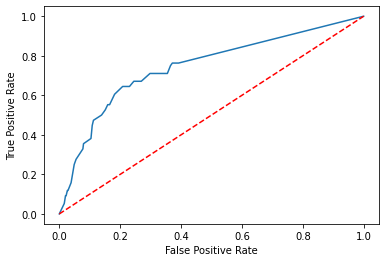

In [241]:
# DECISION TREE
import array
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score


# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Recall","Precision","Balanced Accuracy"])
overall_accuracy = 0
overall_recall =0
overall_precision=0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Tree Classifier"+'\033[0m')
for cl in drugs:

    row = []

    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    #We want to select only the features that are relevant for this type of drug
    
    select = SelectFromModel(estimator=LogisticRegression())
    select.fit(X_train, y_train)
    
    status = select.get_support()
    #print("Selection status: ", list(status) )


    features = list(allData.drop(drugs,axis=1).columns.values)
    #print("All features:")
    #print(features) 
  
    print("Selected features:")
    selected_features=[]
    index = 0
    for elem in features:
        if (status[index]==True):
            selected_features.append(elem)
        index=index+1
    print(selected_features)

    X_train, X_test, y_train, y_test = train_test_split( allData[selected_features],allData[cl], test_size=0.3,random_state=0)
    clf1 = tree.DecisionTreeClassifier()
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    # select.transform(X_train) 
   # y_pred = clf1.predict(X_test)
    # #print("Prediction for "+cl)
    # #plot_confusion_matrix(clf, X_test, y_test) 
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Accuracy for "+cl+" : "+str(balanced_accuracy_score(y_test, y_pred)))
    overall_accuracy = overall_accuracy + balanced_accuracy_score(y_test, y_pred)
    overall_recall = overall_recall + recall_score(y_test, y_pred, average='weighted')
    overall_precision = overall_precision + precision_score(y_test, y_pred, average='weighted')
    # #saving matric to CSV
    matrix.to_csv("results/tree_classifier/confusion_matrix/"+cl+"_confusion_matrix.csv")
    # #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/tree_classifier/ROC/"+cl+"_roc.png")
    
    # #Adding the accuracy results to the result array
    # #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Precision":precision_score(y_test, y_pred, average='weighted'),"Recall":recall_score(y_test, y_pred, average='weighted'),"Balanced Accuracy":balanced_accuracy_score(y_test, y_pred)}
    results = results.append(new_row,ignore_index=True)
    # overall_accuracy = overall_accuracy+ acc1+acc2+acc3

new_row = {"Drug":"All drugs","Recall":overall_recall/len(drugs),"Precision":overall_precision/len(drugs),"Balanced Accuracy":overall_accuracy/len(drugs)}
results = results.append(new_row,ignore_index=True) 
results.to_csv("results/tree_classifier/tree_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/len(drugs)))

Random Forest Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.536653      0.500000  0.500000
1      amphet     0.667124      0.616257  0.669147
2        amyl     0.552739      0.501820  0.558831
3      benzos     0.676318      0.621675  0.672567
4        caff     0.500000      0.500000  0.500000
5     canabis     0.726110      0.733264  0.788161
6        choc     0.499102      0.500000  0.500000
7        coke     0.586920      0.614631  0.661098
8       crack     0.539913      0.499016  0.524878
9     ecstasy     0.709839      0.645580  0.706322
10     heroin     0.514821      0.519382  0.536311
11   ketamine     0.533174      0.522400  0.525625
12     legalh     0.746107      0.680006  0.789253
13        lsd     0.743733      0.604710  0.724249
14       meth     0.705087      0.536219  0.642785
15  mushrooms     0.744391      0.631361  0.754564
16   nicotine     0.627794      0.618542  0.673006
17      semer     0.500000      0.500000  0.500000
18    

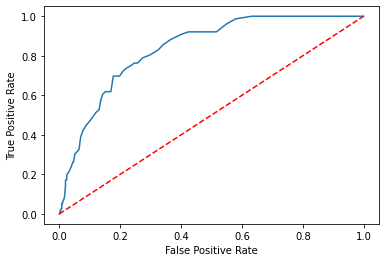

In [172]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Random Forest Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', RandomForestClassifier())
    ])
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    #print("Prediction for "+cl)
    #plot_confusion_matrix(clf, X_test, y_test)  
    #cf_matrix = confusion_matrix(y_test, y_pred)
    #print(cf_matrix)
    # print("Balanced Accuracy : ",str(balanced_accuracy_score(y_test, y_pred)))
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', RandomForestClassifier())
    ])
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba = clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_personnality.png")

    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', RandomForestClassifier())
    ])
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba = clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

Suppoprt Vector Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.499096      0.500000  0.500000
1      amphet     0.673387      0.625887  0.704440
2        amyl     0.498889      0.500000  0.507510
3      benzos     0.681469      0.655100  0.699020
4        caff     0.500000      0.500000  0.500000
5     canabis     0.750829      0.686776  0.785564
6        choc     0.500000      0.500000  0.500000
7        coke     0.578641      0.619525  0.664226
8       crack     0.500000      0.500000  0.500000
9     ecstasy     0.700612      0.658180  0.711422
10     heroin     0.500000      0.500000  0.500000
11   ketamine     0.500000      0.500000  0.507750
12     legalh     0.776355      0.693268  0.783492
13        lsd     0.758749      0.591338  0.735682
14       meth     0.649567      0.526064  0.669408
15  mushrooms     0.758801      0.648955  0.752521
16   nicotine     0.629631      0.622427  0.678162
17      semer     0.500000      0.500000  0.500000
18  

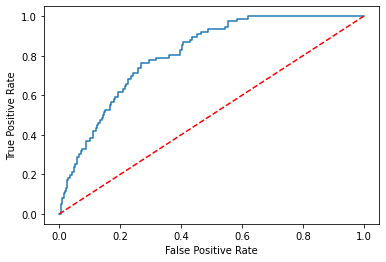

In [173]:
# SUPPORT VECTOR
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Suppoprt Vector Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', svm.SVC(probability=True))
    ])
   
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    #print("Prediction for "+cl)
    #plot_confusion_matrix(clf, X_test, y_test)  
    #cf_matrix = confusion_matrix(y_test, y_pred)
    #print(cf_matrix)
    # print("Balanced Accuracy : ",str(balanced_accuracy_score(y_test, y_pred)))
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', svm.SVC(probability=True))
    ])
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba =  clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_personnality.png")

    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', svm.SVC(probability=True))
    ])
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba =  clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/svm_classifier/svm_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

K-nearest Neighbours Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.537557      0.493671  0.499096
1      amphet     0.521589      0.619845  0.652782
2        amyl     0.600632      0.564291  0.577088
3      benzos     0.578875      0.616692  0.655015
4        caff     0.500000      0.499099  0.499099
5     canabis     0.699455      0.692983  0.768042
6        choc     0.499102      0.500000  0.499102
7        coke     0.547977      0.627090  0.621885
8       crack     0.552233      0.509130  0.516766
9     ecstasy     0.656338      0.651134  0.671079
10     heroin     0.540663      0.550130  0.564502
11   ketamine     0.544150      0.576025  0.518769
12     legalh     0.714990      0.621964  0.746613
13        lsd     0.632679      0.604492  0.710055
14       meth     0.592857      0.563925  0.620040
15  mushrooms     0.717311      0.631684  0.709869
16   nicotine     0.584898      0.562539  0.614149
17      semer     0.500000      0.500000  0.500000

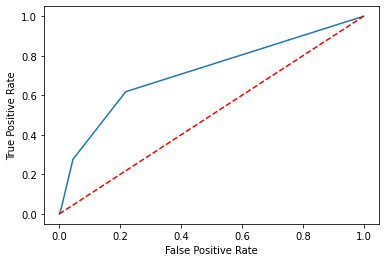

In [174]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"K-nearest Neighbours Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', KNeighborsClassifier(n_neighbors=3))
    ])
    
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba =  clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', KNeighborsClassifier(n_neighbors=3))
    ])
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba =  clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_personnality.png")


    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1",dual=False))),
    ('classification', KNeighborsClassifier(n_neighbors=3))
    ])
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba =  clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/knn_classifier/knn_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

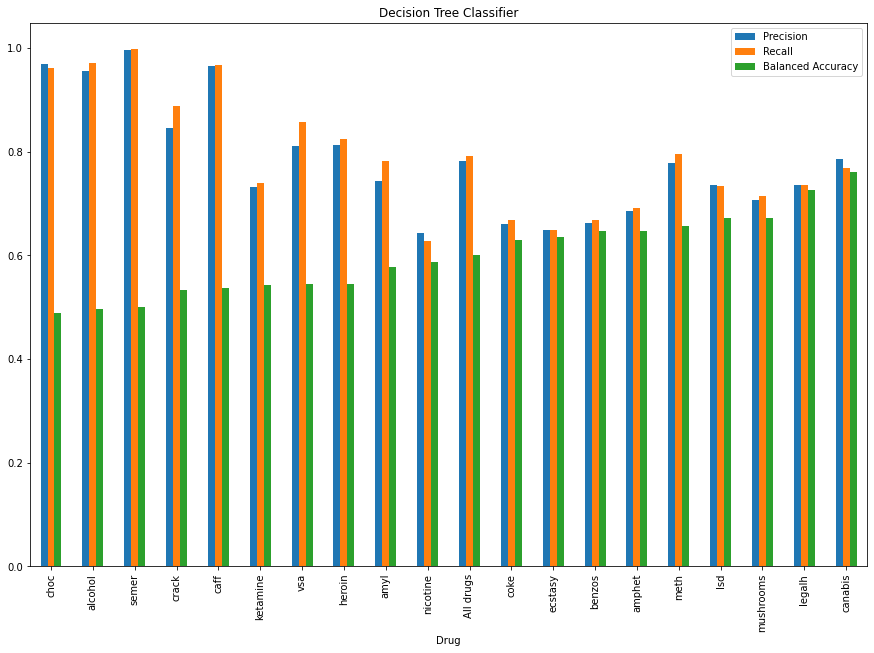

In [239]:
# We want to plot the results to visualise them 

#Decision tree 
tree_results = pd.read_csv("results/tree_classifier/tree_classifier_results.csv")
tree_results = tree_results[tree_results["Balanced Accuracy"] > 0].sort_values("Balanced Accuracy")
fig1 =tree_results.plot(x="Drug",y=["Precision","Recall","Balanced Accuracy"],kind="bar",title="Decision Tree Classifier",figsize=(15,10))
pic = fig1.get_figure()

pic.savefig("results/tree_classifier/tree_results.png")
# #Random Forest
# random_forest_results = pd.read_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
# random_forest_results = random_forest_results[random_forest_results["All"] > 0].sort_values("Demographic")
# fig2 = random_forest_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="Random Forest Classifier",figsize=(15,10))
# pic = fig2.get_figure()
# pic.savefig("results/random_forest_classifier/random_forest_results.png")

# #SVM
# svm_results = pd.read_csv("results/svm_classifier/svm_classifier_results.csv")
# svm_results = svm_results[svm_results["All"] > 0].sort_values("Demographic")
# fig3 = svm_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="Support Vector Machine",figsize=(15,10))
# pic = fig3.get_figure()
# pic.savefig("results/svm_classifier/svm_results.png")
# #KNN
# knn_results = pd.read_csv("results/knn_classifier/knn_classifier_results.csv")
# knn_results = knn_results[knn_results["All"] > 0].sort_values("Demographic")
# fig4 = knn_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="K-nearest neighbours Classifier",figsize=(15,10))
# pic = fig4.get_figure()
# pic.savefig("results/knn_classifier/knn_results.png")